In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/cleaned_data.csv')
df.head()


,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,MerDateDay
0,11897185,7,2025-01-30 10:22:00,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
1,11897186,21,2025-01-30 10:21:42,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
2,11897187,23,2025-01-30 10:21:56,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
3,11897188,21,2025-01-30 10:21:56,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
4,11897189,23,2025-01-30 10:21:57,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30


What types of lane errors typically occur in the machine, and what are their causes?

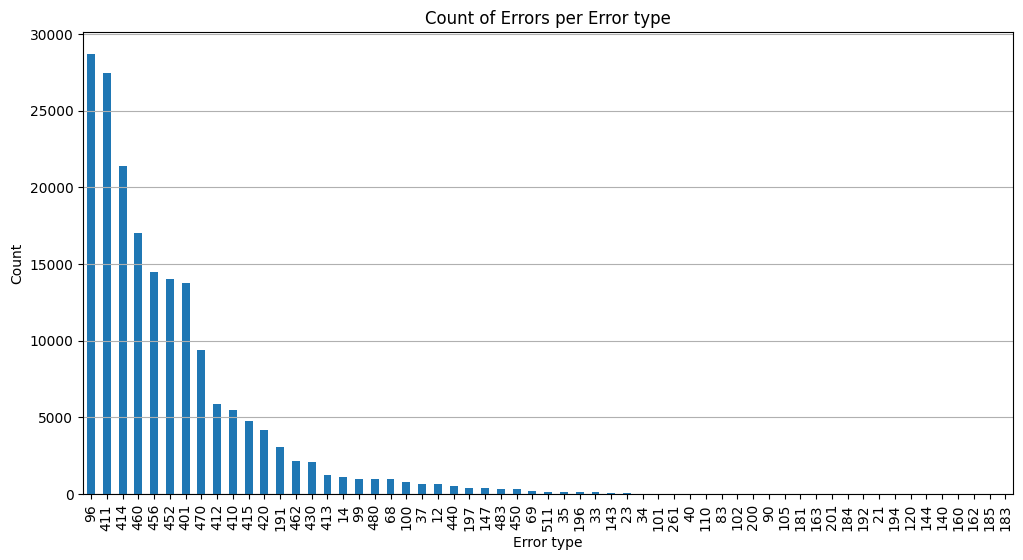

In [44]:
error = df[(df['MerType'] == 21)]
# eda['MerNumber'].value_counts()
# Create a bar chart for the count of occurrences per MerNumber
error['MerNumber'].value_counts().plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Error type')
plt.ylabel('Count')
plt.title('Count of Errors per Error type')
plt.grid(axis='y')
# Save the plot as a picture
plt.savefig('error_type_count_plot.jpg')
plt.show()

What types of machine errors typically occur in the machine, and what are their causes?

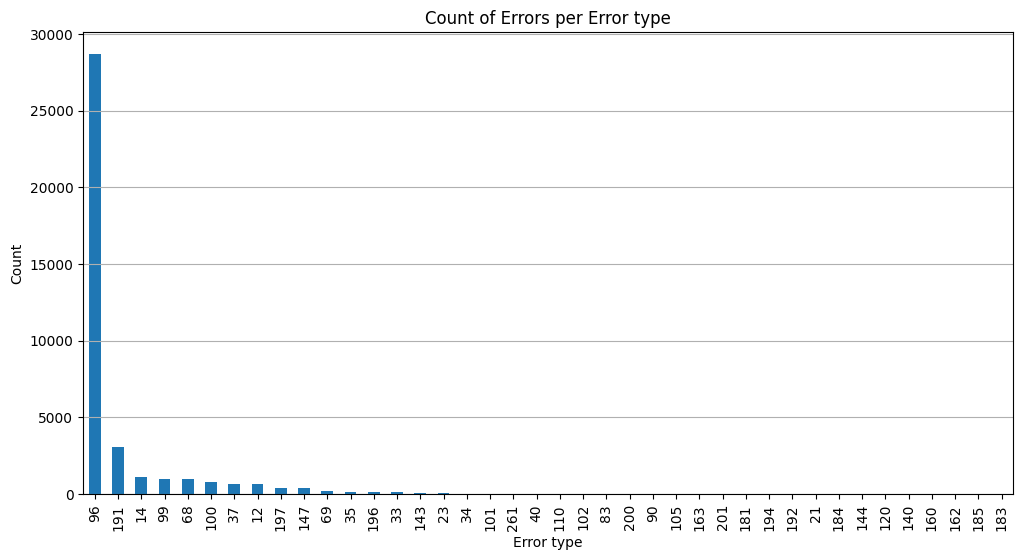

In [29]:
machine = df[(df['MerType'] == 21) &(df['MerNumber'] < 400)]
# eda['MerNumber'].value_counts()
# Create a bar chart for the count of occurrences per MerNumber
machine['MerNumber'].value_counts().plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Error type')
plt.ylabel('Count')
plt.title('Count of Machine Errors per Error type')
plt.grid(axis='y')
# Save the plot as a picture
plt.show()

- 96 means a rerouting
- 191 means a foreign object detected at the infeed

Zooming on on 96 machine error and which lane the error happened

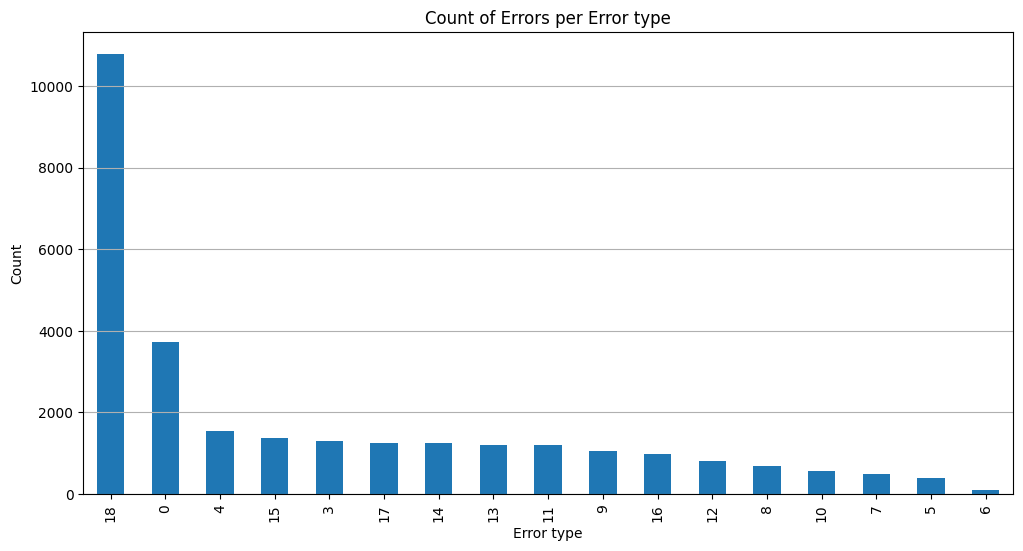

In [35]:
machine = df[(df['MerType'] == 21) &(df['MerNumber'] == 96)]
# eda['MerNumber'].value_counts()
# Create a bar chart for the count of occurrences per MerNumber
machine['MerSubNumber'].value_counts().plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Error type')
plt.ylabel('Count')
plt.title('Count of Errors per Error type')
plt.grid(axis='y')
# Save the plot as a picture
plt.show()

Correlation between warnings and errors: 0.4760720879654521


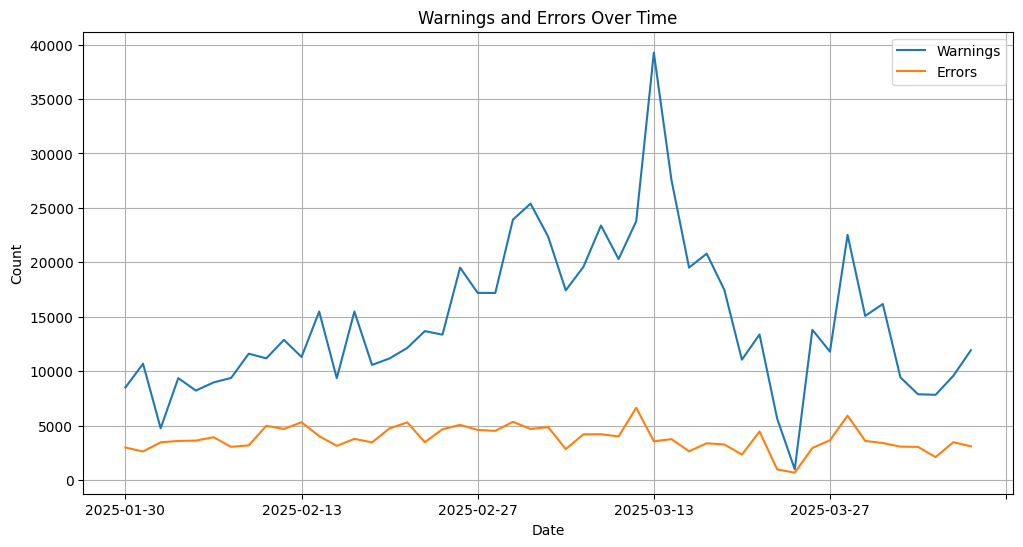

In [34]:
# Filter warnings (MerType 22) and errors (MerType 21)
warnings = df[df['MerType'] == 22]
errors = df[df['MerType'] == 21]

# Group warnings and errors by date
warnings_grouped = warnings.groupby('MerDateDay').size().rename('Warnings')
errors_grouped = errors.groupby('MerDateDay').size().rename('Errors')

# Combine warnings and errors into a single DataFrame
warnings_errors = pd.concat([warnings_grouped, errors_grouped], axis=1).fillna(0)

# Calculate correlation between warnings and errors
correlation = warnings_errors['Warnings'].corr(warnings_errors['Errors'])
print(f"Correlation between warnings and errors: {correlation}")

# Plot warnings and errors over time
warnings_errors.plot(figsize=(12, 6))
plt.title('Warnings and Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Warnings', 'Errors'])
plt.grid()
plt.show()

Warnings are made before errors. Not all warnings cause errors. Filter the warnings that cause an error.

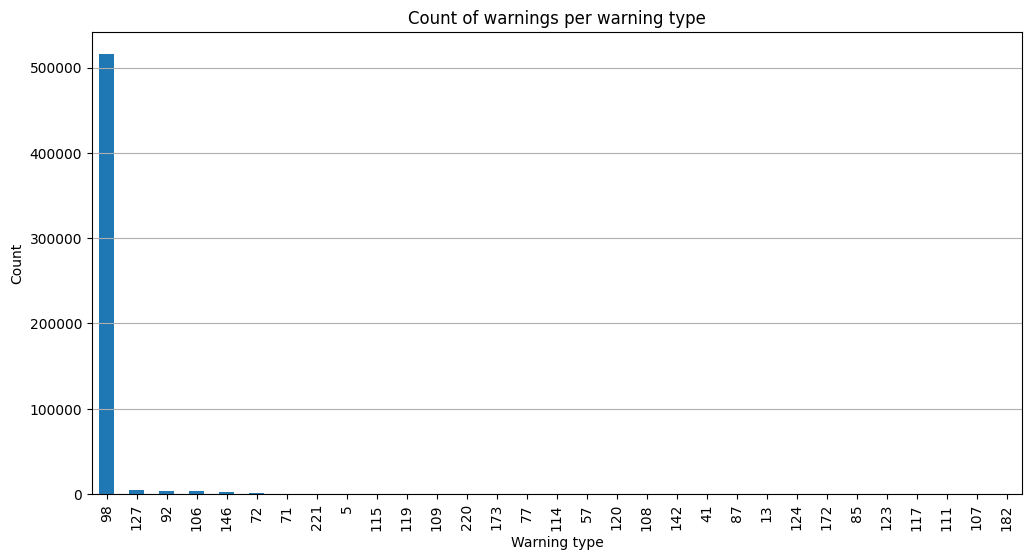

In [41]:
machine = df[(df['MerType'] == 22) &(df['MerNumber'] < 400)]
# eda['MerNumber'].value_counts()
# Create a bar chart for the count of occurrences per MerNumber
machine['MerNumber'].value_counts().plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Warning type')
plt.ylabel('Count')
plt.title('Count of warnings per warning type')
plt.grid(axis='y')
# Save the plot as a picture
plt.savefig('warning_type_count_plot.jpg')
plt.show()